In [1]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers


In [ ]:
# file_path = '/content/drive/My Drive/path/to/your/file.txt'
# with open(file_path, 'r') as file:
#     content = file.read()
#     print(content)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)


train_ds = image_dataset_from_directory(
    '../hotdog-nothotdog/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
valid_ds = image_dataset_from_directory(
    '../hotdog-nothotdog/test',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

Found 4242 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


In [12]:
# Converting data to float
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = (
    train_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
valid_ds = (
    valid_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [13]:
# Load pretrained model Xception
pretrained_model = tf.keras.applications.xception.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=[128,128,3],
)
pretrained_model.trainable = False

In [14]:
model = keras.Sequential([
    # Preprocessing images
    pretrained_model,

    layers.GlobalAveragePooling2D(),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [15]:
model.compile(optimizer = 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [16]:
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=4,
    shuffle=True,
)

Epoch 1/4
67/67 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8141 - loss: 0.4294 - val_accuracy: 0.8150 - val_loss: 0.3608
Epoch 2/4
67/67 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8954 - loss: 0.2384 - val_accuracy: 0.8600 - val_loss: 0.3178
Epoch 3/4
67/67 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9146 - loss: 0.2012 - val_accuracy: 0.8675 - val_loss: 0.3196
Epoch 4/4
67/67 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.9255 - loss: 0.1771 - val_accuracy: 0.8625 - val_loss: 0.3295


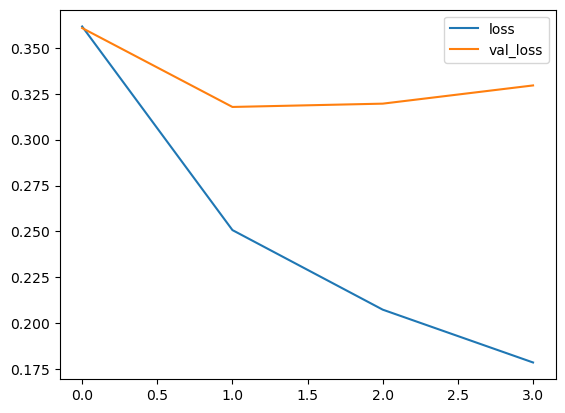

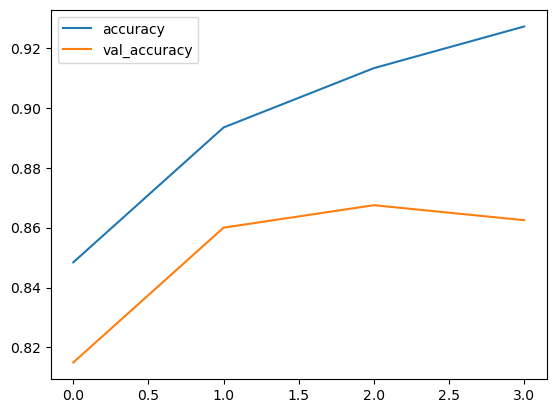

In [17]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [11]:
model.save('../Models/model_autotune_test2.h5')

ValueError: Unable to create dataset (name already exists)